In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data
df = pd.read_csv('/Users/dilanhamawandy/Documents/RNDProject/RND2017.csv')

In [2]:
# Lets take a look at our data
df

,Year,Make,Model,Color,Body_Style,OEM,Mileage,Purchase_Date,Purchased_From,Floor_Plan,Vin_Number,Total_Cost,Repairs_Expenses,Sale_Price,TTL,Sale_Price_With_TTL,Profit,Sale_Date,Time_On_Lot,Percentage_Of_Return
0,2006,BMW,330i,Black,Sedan,Foreign,114135,4/4/17,American,R and D,WBAVB335X6PS17352,"5,804","1,529",6820,712,7532,1111,12/2/17,242,19%
1,2008,BMW,328i,Silver,Sedan,Foreign,129932,1/10/17,Metro,Auction Credit,WBAVA33518P141977,"5,821",471,"7,072",728,7800,1346,3/22/17,71,23%
2,2007,BMW,328i,Black,Sedan,Foreign,133046,12/29/16,American,R and D,WBAVA33597KX81902,"4,796","1,361",6000,658,6658,1299,5/10/17,132,27%
3,2006,BMW,X5,White,SUV,Foreign,134540,6/25/16,Copart,R and D,5UXFA13556LY35649,"4,924","1,836","5,290",611,5901,461,2/23/17,243,9%
4,2009,Chevy,HHR,Red,Hatchback,Domestic,93644,12/29/16,American,Auction Credit,3GNCA23B79S646006,"3,545",310,4890,585,5475,1440,2/15/17,48,41%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2007,Volkswagen,Beetle,Silver,Convertible,Foreign,122000,2/28/17,American,Auction Credit,3VWEW31C67M507875,"2,135",240,"3,505",495,4000,1465,4/8/17,39,69%
93,2009,Volkswagen,Rabbit,Silver,Hatchback,Foreign,63801,9/20/17,Adesa,Auction Credit,WVWBA71K39W026598,"3,688",428,"4,632",568,5200,1039,12/21/17,92,28%
94,2011,Volkswagen,Jetta,Silver,Sedan,Foreign,111109,4/18/17,Metro,AFC,3VWDX7AJ1BM325718,"4,582",472,"5,990",657,6647,1503,6/9/17,52,33%
95,2007,Volkswagen,Jetta,Silver,Sedan,Foreign,115464,4/11/17,Metro,AFC,3VWEF71K87M196237,"2,830",330,"3,200",475,3675,465,4/25/17,14,16%


In [3]:
# Lets check and see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Year - 0%
Make - 0%
Model - 0%
Color - 0%
Body_Style - 0%
OEM - 0%
Mileage - 0%
Purchase_Date - 0%
Purchased_From - 0%
Floor_Plan - 0%
Vin_Number - 0%
Total_Cost - 0%
Repairs_Expenses - 0%
Sale_Price - 0%
TTL - 0%
Sale_Price_With_TTL - 0%
Profit - 0%
Sale_Date - 0%
Time_On_Lot - 0%
Percentage_Of_Return - 0%


In [4]:
# Great! Lets identify our data types to better understand our data

df.dtypes

Year                     int64
Make                    object
Model                   object
Color                   object
Body_Style              object
OEM                     object
Mileage                  int64
Purchase_Date           object
Purchased_From          object
Floor_Plan              object
Vin_Number              object
Total_Cost              object
Repairs_Expenses        object
Sale_Price              object
TTL                      int64
Sale_Price_With_TTL      int64
Profit                   int64
Sale_Date               object
Time_On_Lot              int64
Percentage_Of_Return    object
dtype: object

In [5]:
# Lets order our data by 'Profit' descending to see which vehicles were most profitable

df = df.sort_values(by = ['Profit'], inplace = False, ascending = False)

In [6]:
df

,Year,Make,Model,Color,Body_Style,OEM,Mileage,Purchase_Date,Purchased_From,Floor_Plan,Vin_Number,Total_Cost,Repairs_Expenses,Sale_Price,TTL,Sale_Price_With_TTL,Profit,Sale_Date,Time_On_Lot,Percentage_Of_Return
59,2006,Mini,Cooper,Blue,Hatchback,Foreign,70532,11/1/16,Metro,Auction Credit,WMWRC33576TJ75695,"3,088",403,5490,625,6115,2497,1/3/17,63,81%
88,2005,Toyota,4Runner,Silver,SUV,Foreign,210000,5/6/17,Trade-in,R and D,JTEZU14R950050120,"2,515",265,"4,834",582,5416,2414,6/27/17,52,96%
67,2005,Nissan,350z,Orange,Coupe,Foreign,80628,11/22/16,Metro,Auction Credit,JN1AZ36AX5M760063,"6,323",398,8615,829,9444,2387,1/7/17,46,38%
7,2012,Chevy,Malibu,White,Sedan,Domestic,54980,8/22/17,American,Auction Credit,1G1ZD5E09CF379771,"4,647",282,6790,710,7500,2238,9/4/17,13,48%
70,2008,Nissan,Sentra,Black,Sedan,Foreign,84841,2/1/17,Metro,Auction Credit,3N1AB61E48L737036,"3,745","1,135","5,852",648,6500,2202,3/27/17,54,59%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2010,Mazda,3,Silver,Sedan,Foreign,126408,1/17/17,Metro,R and D,JM1BL1SF8A1218139,"5,750","1,520","5,490",625,6115,-165,7/21/17,185,-3%
83,2009,Toyota,Yaris,Maroon,Sedan,Foreign,108618,3/28/17,Metro,R and D,JTDJT903795257389,"4,620",910,"4,347",550,4897,-178,12/15/17,262,-4%
8,2011,Chevy,Aveo,Gray,Sedan,Domestic,78539,3/15/16,Metro,R and D,KL1TD5DE5BB236565,"5,454","2,464","4,990",592,5582,-369,9/25/17,559,-7%
16,2007,Dodge,Caliber,Silver,Hatchback,Domestic,105228,12/20/16,American,Auction Credit,1B3HB48B47D313907,"4,560",815,"4,000",527,4527,-465,4/24/17,125,-10%


In [7]:
# We want to take a look and see if there is any correlation between 'Profit' and other numeric columns 
# We will do this by creating a correlation matrix between all numeric columns using Pearson, Kendall, and Spearman

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)

                         Year   Mileage       TTL  Sale_Price_With_TTL  \
Year                 1.000000 -0.527963  0.494755             0.494826   
Mileage             -0.527963  1.000000 -0.434984            -0.435014   
TTL                  0.494755 -0.434984  1.000000             0.999997   
Sale_Price_With_TTL  0.494826 -0.435014  0.999997             1.000000   
Profit              -0.002501 -0.128886  0.351552             0.351469   
Time_On_Lot          0.167400  0.026176 -0.011764            -0.011438   

                       Profit  Time_On_Lot  
Year                -0.002501     0.167400  
Mileage             -0.128886     0.026176  
TTL                  0.351552    -0.011764  
Sale_Price_With_TTL  0.351469    -0.011438  
Profit               1.000000    -0.504059  
Time_On_Lot         -0.504059     1.000000  


In [8]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='kendall')
print(correlation_matrix)

                         Year   Mileage       TTL  Sale_Price_With_TTL  \
Year                 1.000000 -0.297736  0.280180             0.279134   
Mileage             -0.297736  1.000000 -0.189122            -0.188876   
TTL                  0.280180 -0.189122  1.000000             0.998700   
Sale_Price_With_TTL  0.279134 -0.188876  0.998700             1.000000   
Profit              -0.024211 -0.111481  0.246791             0.246471   
Time_On_Lot          0.109343  0.107893 -0.032688            -0.030916   

                       Profit  Time_On_Lot  
Year                -0.024211     0.109343  
Mileage             -0.111481     0.107893  
TTL                  0.246791    -0.032688  
Sale_Price_With_TTL  0.246471    -0.030916  
Profit               1.000000    -0.352360  
Time_On_Lot         -0.352360     1.000000  


In [9]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='spearman')
print(correlation_matrix)

                         Year   Mileage       TTL  Sale_Price_With_TTL  \
Year                 1.000000 -0.396352  0.355978             0.355845   
Mileage             -0.396352  1.000000 -0.272743            -0.272206   
TTL                  0.355978 -0.272743  1.000000             0.999934   
Sale_Price_With_TTL  0.355845 -0.272206  0.999934             1.000000   
Profit              -0.029155 -0.174259  0.379558             0.379645   
Time_On_Lot          0.155194  0.161473 -0.050237            -0.048717   

                       Profit  Time_On_Lot  
Year                -0.029155     0.155194  
Mileage             -0.174259     0.161473  
TTL                  0.379558    -0.050237  
Sale_Price_With_TTL  0.379645    -0.048717  
Profit               1.000000    -0.508985  
Time_On_Lot         -0.508985     1.000000  


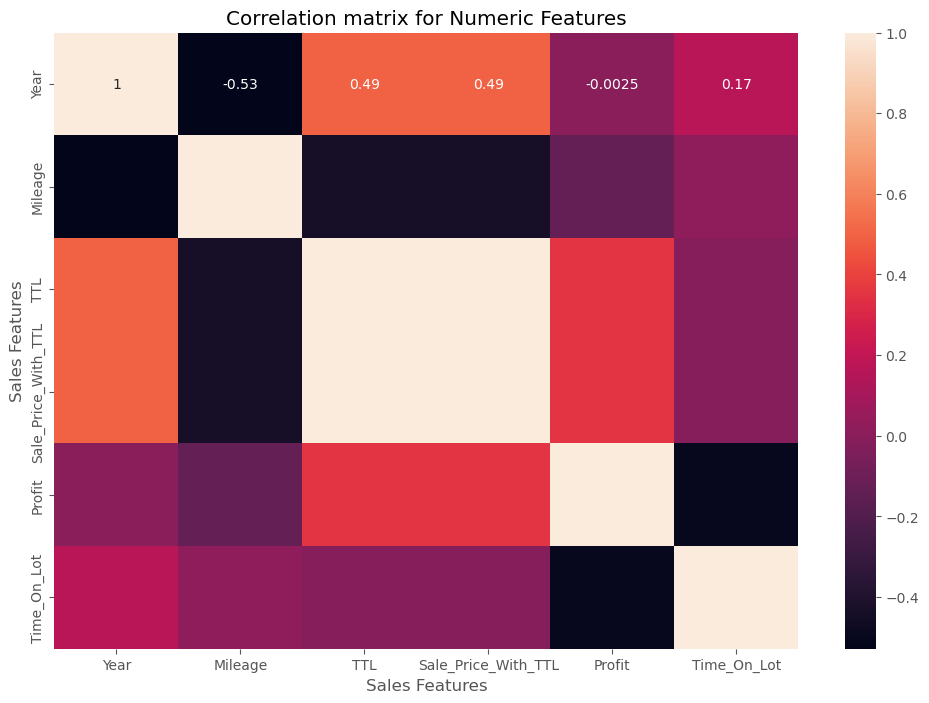

In [10]:
# We will create a heatmap to compare correlation for numeric features
# Simply another way to visualize correlation between columns

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Sales Features")

plt.ylabel("Sales Features")

plt.show()

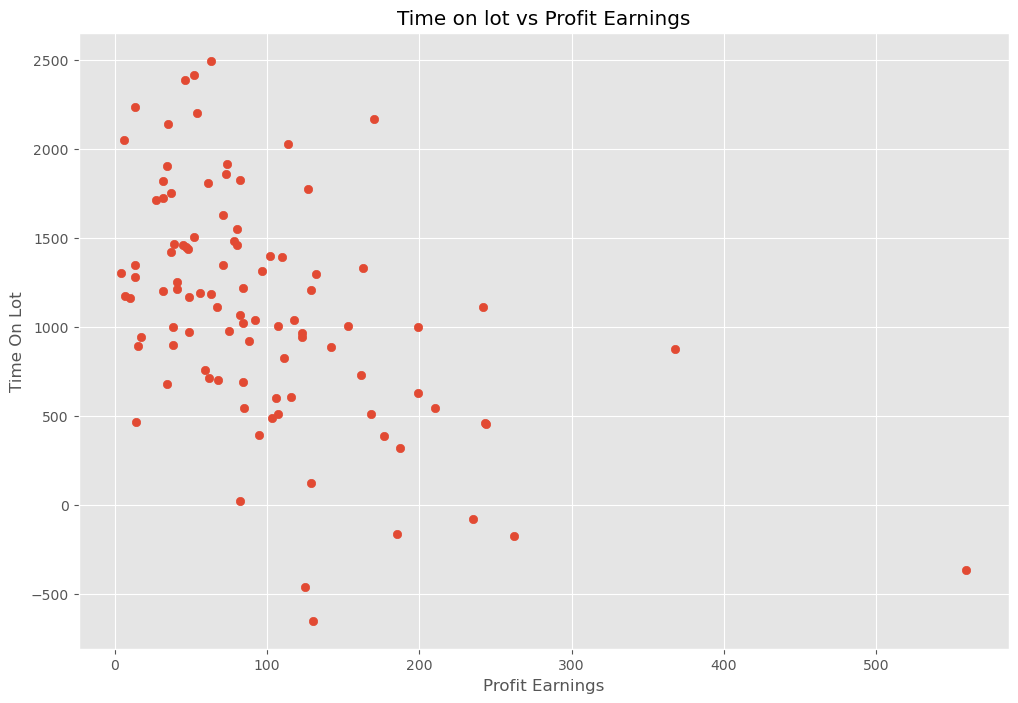

In [20]:
# After looking at our heat map and correlation matrix we are able to identify that there are not strong positive correlations, but there are one or two negative correlations that affect our profit margins
# Lets create a scatter plot with time_on_lot vs Profit

plt.scatter(x=df['Time_On_Lot'], y=df['Profit'])

plt.title('Time on lot vs Profit Earnings')

plt.xlabel('Profit Earnings')

plt.ylabel('Time On Lot')

plt.show()

<Axes: xlabel='Time_On_Lot', ylabel='Profit'>

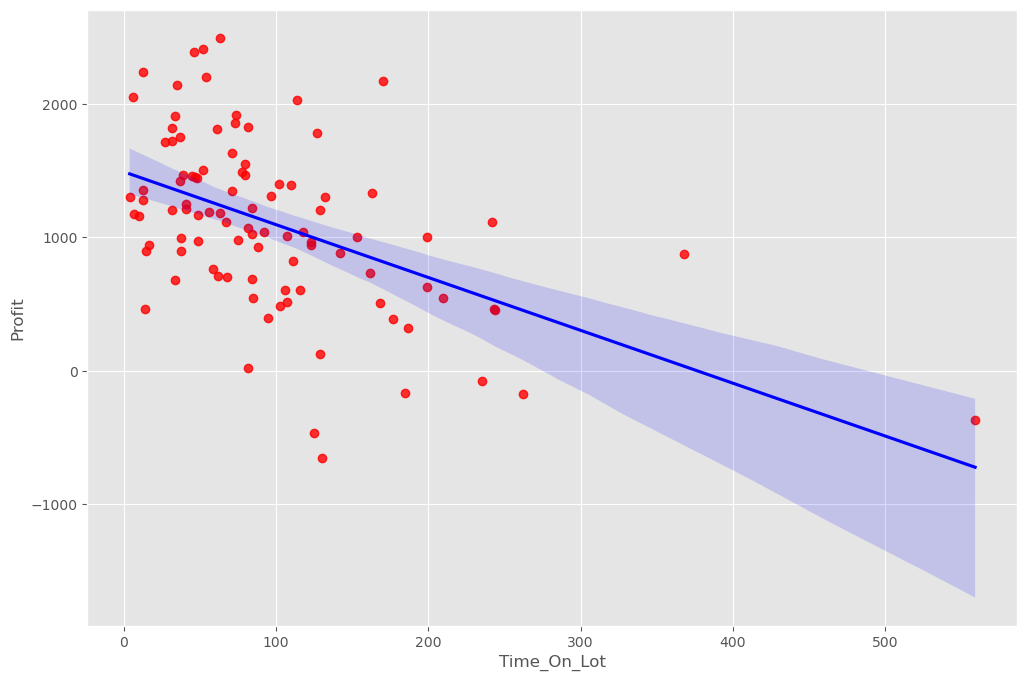

In [13]:
# Now we will use a regression plot comparing Time on lot vs. profit using seaborn

sns.regplot(x = 'Time_On_Lot', y = 'Profit', data = df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [14]:
# We now want to see do other categorical values that are numeric have any correlation

# Lets use factorize which assigns a random numeric value for each unique categorical value

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,Year,Make,Model,Color,Body_Style,OEM,Mileage,Purchase_Date,Purchased_From,Floor_Plan,Vin_Number,Total_Cost,Repairs_Expenses,Sale_Price,TTL,Sale_Price_With_TTL,Profit,Sale_Date,Time_On_Lot,Percentage_Of_Return
59,2006,16,17,1,2,1,70532,8,3,1,93,20,54,57,625,6115,2497,4,63,54
88,2005,22,5,10,4,1,210000,39,5,2,71,12,36,29,582,5416,2414,58,52,57
67,2005,18,4,8,1,1,80628,11,3,1,62,89,53,79,829,9444,2387,5,46,33
7,2012,1,33,12,5,0,54980,47,1,1,9,62,39,70,710,7500,2238,76,13,40
70,2008,18,45,0,5,1,84841,20,3,1,35,36,9,53,648,6500,2202,35,54,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2010,14,0,10,5,1,126408,1,3,2,57,81,18,47,625,6115,-165,62,185,3
83,2009,22,55,7,5,1,108618,29,3,2,69,60,88,24,550,4897,-178,14,262,4
8,2011,1,9,4,5,0,78539,25,3,2,73,76,28,31,592,5582,-369,73,559,5
16,2007,4,13,10,2,0,105228,17,1,1,1,56,85,18,527,4527,-465,42,125,0


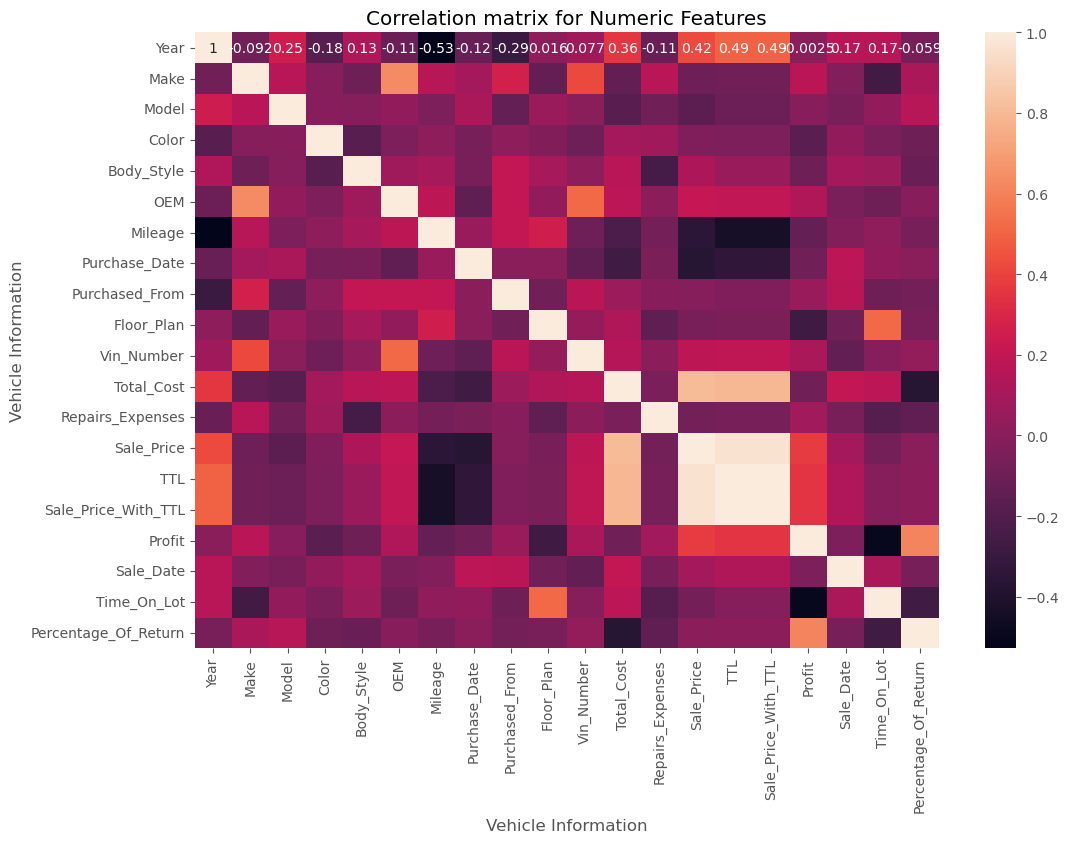

In [21]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Vehicle Information")

plt.ylabel("Vehicle Information")

plt.show()

In [22]:
df_numerized.corr()

,Year,Make,Model,Color,Body_Style,OEM,Mileage,Purchase_Date,Purchased_From,Floor_Plan,Vin_Number,Total_Cost,Repairs_Expenses,Sale_Price,TTL,Sale_Price_With_TTL,Profit,Sale_Date,Time_On_Lot,Percentage_Of_Return
Year,1.000000,-0.092229,0.246600,-0.175285,0.133204,-0.106540,-0.527963,-0.116257,-0.290269,0.015897,0.076550,0.361340,-0.114492,0.422500,0.494755,0.494826,-0.002501,0.167997,0.167400,-0.059188
Make,-0.092229,1.000000,0.166645,-0.010461,-0.099347,0.631405,0.158796,0.089705,0.269320,-0.139247,0.420856,-0.138352,0.165628,-0.095837,-0.088335,-0.088850,0.175791,-0.024681,-0.263718,0.114033
Model,0.246600,0.166645,1.000000,-0.005860,-0.010695,0.027738,-0.043175,0.113662,-0.132821,0.062581,0.000571,-0.176148,-0.088155,-0.158656,-0.109426,-0.109005,-0.005559,-0.060768,0.028347,0.158979
Color,-0.175285,-0.010461,-0.005860,1.000000,-0.178967,-0.043290,0.018490,-0.068014,0.019622,-0.030853,-0.094340,0.095739,0.079361,-0.034532,-0.043312,-0.043527,-0.169816,0.029810,-0.054396,-0.101784
Body_Style,0.133204,-0.099347,-0.010695,-0.178967,1.000000,0.075158,0.103150,-0.061719,0.203586,0.104097,0.019266,0.165114,-0.250743,0.124617,0.062253,0.062481,-0.099674,0.092933,0.068665,-0.111114
OEM,-0.106540,0.631405,0.027738,-0.043290,0.075158,1.000000,0.188134,-0.149138,0.203564,0.029575,0.517320,0.180848,0.015076,0.207269,0.199237,0.198971,0.128812,-0.054804,-0.103279,-0.008568
Mileage,-0.527963,0.158796,-0.043175,0.018490,0.103150,0.188134,1.000000,0.060138,0.200791,0.256223,-0.097324,-0.219928,-0.069026,-0.354769,-0.434984,-0.435014,-0.128886,-0.022188,0.026176,-0.064680
Purchase_Date,-0.116257,0.089705,0.113662,-0.068014,-0.061719,-0.149138,0.060138,1.000000,0.002122,-0.002085,-0.146720,-0.270200,-0.046513,-0.367234,-0.336138,-0.335751,-0.081649,0.181020,0.032036,-0.000228
Purchased_From,-0.290269,0.269320,-0.132821,0.019622,0.203586,0.203564,0.200791,0.002122,1.000000,-0.084972,0.173462,0.068173,-0.006138,-0.010418,-0.034887,-0.035194,0.059077,0.172448,-0.102795,-0.077808
Floor_Plan,0.015897,-0.139247,0.062581,-0.030853,0.104097,0.029575,0.256223,-0.002085,-0.084972,1.000000,0.042308,0.139868,-0.147300,-0.058546,-0.044934,-0.044879,-0.274190,-0.082477,0.521986,-0.061271


In [23]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

Year                  Year                    1.000000
                      Make                   -0.092229
                      Model                   0.246600
                      Color                  -0.175285
                      Body_Style              0.133204
                                                ...   
Percentage_Of_Return  Sale_Price_With_TTL     0.009141
                      Profit                  0.606286
                      Sale_Date              -0.067931
                      Time_On_Lot            -0.271204
                      Percentage_Of_Return    1.000000
Length: 400, dtype: float64

In [24]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

Mileage               Year                   -0.527963
Year                  Mileage                -0.527963
Time_On_Lot           Profit                 -0.504059
Profit                Time_On_Lot            -0.504059
Sale_Price_With_TTL   Mileage                -0.435014
                                                ...   
TTL                   TTL                     1.000000
Sale_Price_With_TTL   Sale_Price_With_TTL     1.000000
Profit                Profit                  1.000000
Floor_Plan            Floor_Plan              1.000000
Percentage_Of_Return  Percentage_Of_Return    1.000000
Length: 400, dtype: float64

In [25]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

Vin_Number            OEM                     0.517320
OEM                   Vin_Number              0.517320
Floor_Plan            Time_On_Lot             0.521986
Time_On_Lot           Floor_Plan              0.521986
Profit                Percentage_Of_Return    0.606286
Percentage_Of_Return  Profit                  0.606286
Make                  OEM                     0.631405
OEM                   Make                    0.631405
Sale_Price_With_TTL   Total_Cost              0.796934
Total_Cost            Sale_Price_With_TTL     0.796934
TTL                   Total_Cost              0.796973
Total_Cost            TTL                     0.796973
                      Sale_Price              0.804374
Sale_Price            Total_Cost              0.804374
Sale_Price_With_TTL   Sale_Price              0.961102
Sale_Price            Sale_Price_With_TTL     0.961102
                      TTL                     0.961180
TTL                   Sale_Price              0.961180
          

In [27]:
# We are able to conclude that vehicles that stay on the dealer lot for long periods of time see lower profit margins.

# Generally speaking there aren't any positive correlations with dataset

# The strongest negative correlation is that the longer a vehicle is on the lot the profit margins will decline